In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp.columns = ['review', 'sentiment']

In [3]:
yelp.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#Original - Feature engineering review column using keywords
#Good review keywords
keywords = ['love', 'loved', 'good', 'great', 'amazing', 'cute', 'friendly', 'prompt','highly recommended', 'delicious', 'yummy',
           'fresh','quickly', 'personable', 'attentive', 'fantastic']

for key in keywords:
    
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

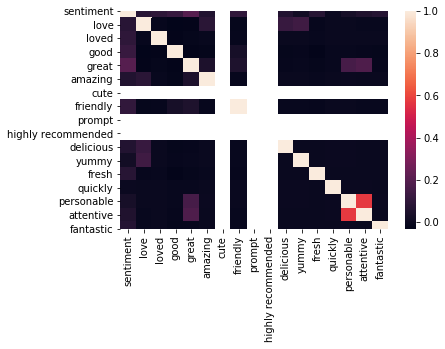

In [5]:
#Heatmap to show independence
sns.heatmap(yelp.corr())

In [6]:
data = yelp[keywords]
target = yelp['sentiment']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 387


In [8]:
#Percent of mislabeled points
387/1000*100

38.7

In [9]:
#Success Rate/Accuracy of model
(1000-387)/1000*100

61.3

In [10]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[478,  22],
       [365, 135]], dtype=int64)

Confusion Matrix:

True Positive = 478 <br>
False Negative (Type I Error) = 22 <br>
False Positive (Type II Error) = 365 <br>
True Negative = 135 <br><br>

Sensitivity (percent of positives correctly id) = (TP/TP + FN, true positive rate) = 478/(478+22) = 95.6% <br>
Specificity (percent of negatives correctly id, true negative rate) = (TN/TN + FP) = 135/(135+365) = 27.0% <br><br>

The confusion matrix indicates that the model is having a problem with predicting negatives correctly.  This means that the model is mislabeling negative reviews as positive reviews.  However, the model is consistent with predicting positives. <br><br> 

Need to minimize false positives. <br>
Precision = TP/(TP+FP) = 478/(478+365) = 56.7%

In [11]:
#Iterated Version 1 - Adding more positive review keywords

#Positive review keywords
keywords = ['love', 'loved', 'good', 'great', 'amazing', 'cute', 'friendly', 'prompt','highly recommended', 'delicious', 'yummy',
           'fresh','quickly', 'personable', 'attentive', 'fantastic', 'best', 'will return', 'impressed', 'tasty',
           'wonderful', 'flavorful', 'flavourful', 'very clean', 'reasonably priced', 'fast', 'fast service', 'quality service',
           'kind', 'outstanding', 'delish', 'high quality', 'favorite', 'favourite', 'pleasant', 'nice', 'clean']

for key in keywords:
    
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

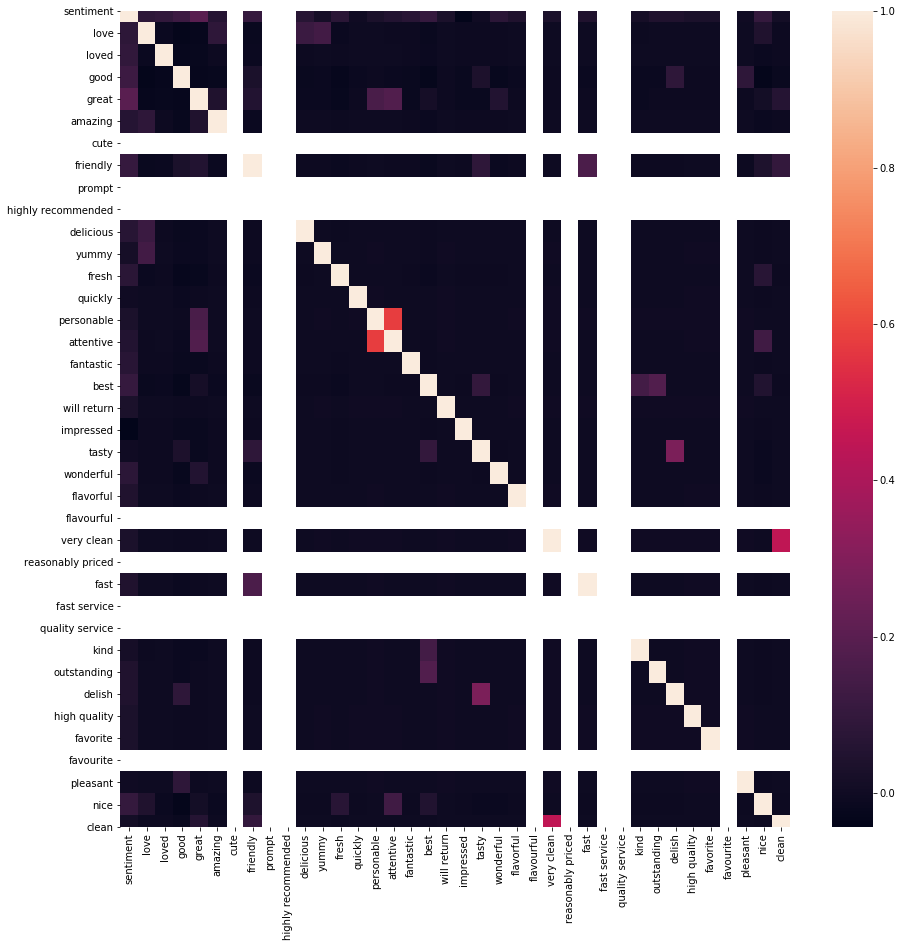

In [12]:
#Heatmap to show independence
plt.figure(figsize=(15, 15))

sns.heatmap(yelp.corr());

In [13]:
data = yelp[keywords]
target = yelp['sentiment']

In [14]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 353


In [15]:
#Percent of mislabeled points
353/1000*100

35.3

In [16]:
#Success Rate/Accuracy of model
(1000-353)/1000*100

64.7

In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[474,  26],
       [327, 173]], dtype=int64)

Confusion Matrix:

True Positive = 474 <br>
False Negative (Type I Error) = 26 <br>
False Positive (Type II Error) = 327 <br>
True Negative = 173 <br><br>
 
Sensitivity (percent of positives correctly id, true positive rate) = (TP/TP + FN) = 474/(474+26) = 94.8% <br>
Specificity (percent of negatives correctly id, true negative rate) = (TN/TN + FP) = 173/(173+327) = 34.6% <br><br>

This model was better at predicting negatives correctly by approx 7%.  However, the sensitivity (true positive rate) decreased slightly from 95.6% to 94.8%.  The addition of good review keywords helped predict more true negative reviews.  However, further iterations of this model should continue to focus on minimizing the rate of false positives. <br><br>

Precision = TP/(TP+FP) = 474/(474+327) = 59.1% <br>
The precision rate increased approx 2.4% from the original model.    

In [18]:
#Iterated Version 2 - Keeping all positive review keywords and adding negative review keywords

#Positive and negative review keywords
keywords = ['love', 'loved', 'good', 'great', 'amazing', 'cute', 'friendly', 'prompt','highly recommended', 'delicious', 'yummy',
           'fresh','quickly', 'personable', 'attentive', 'fantastic', 'best', 'will return', 'impressed', 'tasty',
           'wonderful', 'flavorful', 'flavourful', 'very clean', 'reasonably priced', 'fast', 'fast service', 'quality service',
           'kind', 'outstanding', 'delish', 'high quality', 'favorite', 'favourite', 'pleasant', 'nice', 'clean',
           'disgusting', 'poor', 'bad', 'slow', 'gross', 'not good', 'terrible', 'rude', 'sick', 'bland', 'worst', 
           'avoid', 'stomach ache', 'atrocious', 'disappointed', 'horrible', 'disrespected']

for key in keywords:
    
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

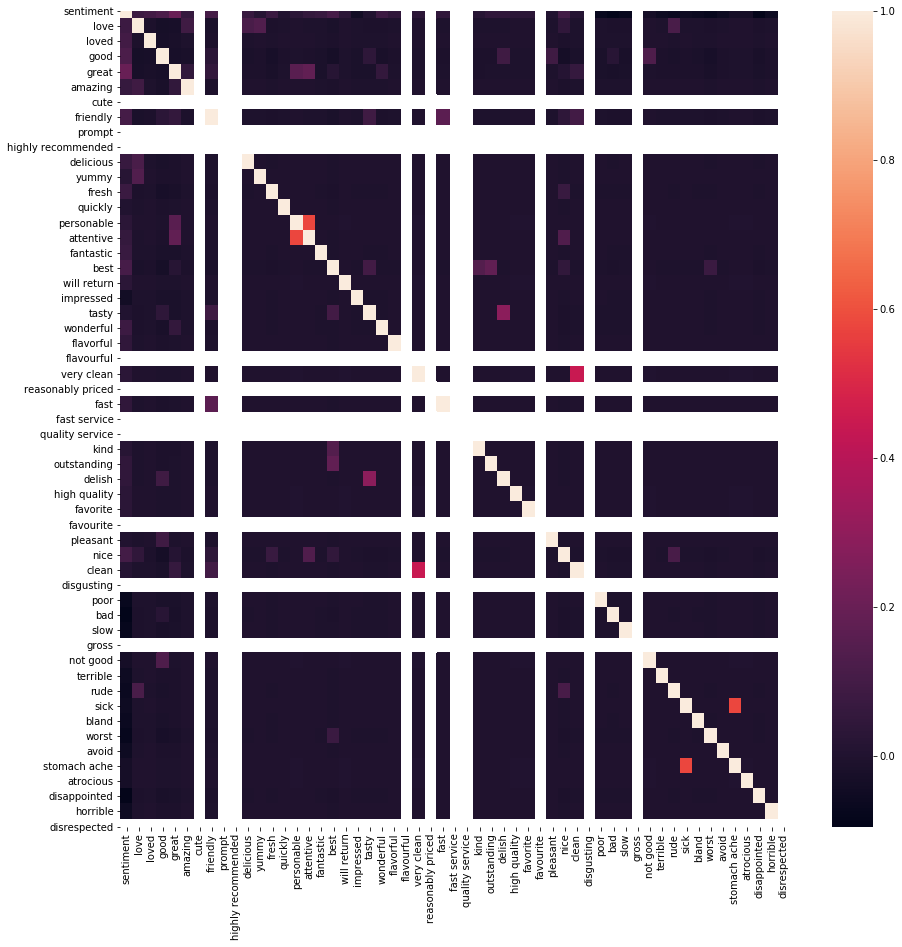

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(yelp.corr());

In [20]:
data = yelp[keywords]
target = yelp['sentiment']

In [21]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 351


In [22]:
#Percent of mislabeled points
351/1000*100

35.099999999999994

In [23]:
#Success Rate/Accuracy of model
(1000-351)/1000*100

64.9

In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[475,  25],
       [326, 174]], dtype=int64)

Confusion Matrix:

True Positive = 475 <br>
False Negative (Type I Error) = 25 <br>
False Positive (Type II Error) = 326 <br>
True Negative = 174 <br> <br>

Sensitivity (percent of positives correctly id, true positive rate) = (TP/TP + FN) = 475/(475+25) = 95% <br>
Specificity (percent of negatives correctly id, true negative rate) = (TN/TN + FP) = 174/(174+326) = 34.8% <br><br>

This iteration showed negligble differences in the sensitivity and specificity rates.  Further iterations of this model should continue to focus on minimizing the rate of false positives, since that is the consistent problem this that occurs in this model. <br><br>

Precision = TP/(TP+FP) = 475/(475+326) = 59.3% <br>
The precision rate increased by 0.2% from the iteration 1. 

In [25]:
#Iterated Version 3 - Deleting highly correlated keywords from iteration 2

#Positive and negative review keywords
keywords = ['love', 'loved', 'good', 'great', 'amazing', 'friendly', 'delicious', 'yummy',
           'fresh','quickly', 'personable', 'attentive', 'fantastic', 'best', 'will return', 'impressed', 'tasty',
           'wonderful', 'flavorful', 'very clean', 'fast', 
           'kind', 'outstanding', 'delish', 'high quality', 'favorite', 'pleasant', 'nice', 'clean',
           'poor', 'bad', 'slow', 'not good', 'terrible', 'rude', 'sick', 'bland', 'worst', 
           'avoid', 'stomach ache', 'atrocious', 'disappointed', 'horrible', 'disrespected']

for key in keywords:
    
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [26]:
data = yelp[keywords]
target = yelp['sentiment']

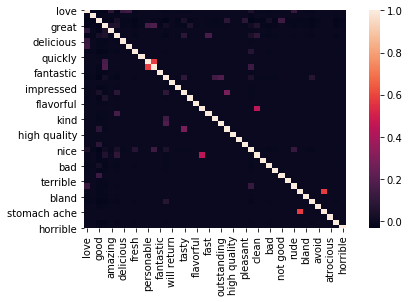

In [27]:
sns.heatmap(data.corr());

In [28]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 351


In [29]:
confusion_matrix(target, y_pred)

array([[475,  25],
       [326, 174]], dtype=int64)

This version, which removed highly correlated keywords from the keyword list, didn't show any difference in outcome.  The model ran exactly the same as it did in version 2.  To attempt to improve the model going forward, I will continue to add relevant and more precise positive and negative keywords.  

In [30]:
#Iterated Version 4 - Adding more relevant and precise keywords, editing existing neutral keywords

#Positive and negative review keywords
keywords = ['love', 'loved', 'did not love', 'good', 'great', 'amazing', 'friendly', 'delicious', 'yummy',
           'fresh','quickly', 'personable', 'attentive', 'fantastic', 'best', 'not the best','will return', 'impressed',
            'tasty', 'will not return', 'not flavorful', 'not fast', 'not very fast', 'not attentive', 'not very attentive',
           'wonderful', 'flavorful', 'very clean', 'fast', 'not fresh', 'not very fresh', 'not pleasant', 'not disappointed',
           'kind', 'outstanding', 'delish', 'high quality', 'favorite', 'pleasant', 'nice', 'clean',
           'poor', 'bad', 'slow', 'not good', 'terrible', 'rude', 'sick', 'bland', 'worst', 'not the worst', 'not horrible',
           'avoid', 'stomach ache', 'atrocious', 'disappointed', 'horrible', 'disrespected', 'did not like', 'not good',
           'was not great', 'not friendly', 'overpriced', 'did not like', 'inexpensive', 'did not enjoy', 'would suck',
           'unsatisfying', 'never go again', 'be back', 'great deal']

for key in keywords:
    
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [31]:
data = yelp[keywords]
target = yelp['sentiment']

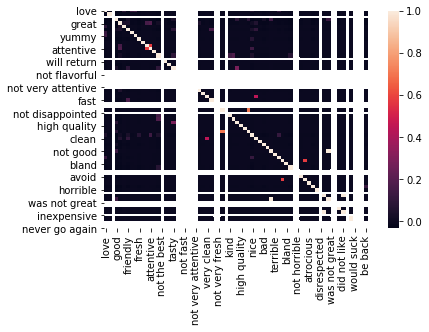

In [32]:
sns.heatmap(data.corr());

In [33]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 350


In [34]:
#Percent of mislabeled points
350/1000*100

35.0

In [35]:
#Success Rate/Accuracy of model
(1000-350)/1000*100

65.0

In [36]:
confusion_matrix(target, y_pred)

array([[476,  24],
       [326, 174]], dtype=int64)

Confusion Matrix:

True Positive = 476 <br>
False Negative (Type I Error) = 24 <br>
False Positive (Type II Error) = 326 <br>
True Negative = 174 <br> <br>

Sensitivity (percent of positives correctly id, true positive rate) = (TP/TP + FN) = 476/(476+24) = 95.2% <br>
Specificity (percent of negatives correctly id, true negative rate) = (TN/TN + FP) = 174/(174+326) = 34.8% <br><br>

This iteration showed a .2% difference in the sensitivity rate and no difference in the specificity rate.  Further iterations of this model should continue to focus on minimizing the rate of false positives, since that is the consistent problem this that occurs in this model. <br><br>

Precision = TP/(TP+FP) = 476/(476+326) = 59.4% <br>
The precision rate increased approx 0.1% from the previous iteration (version 3). 

In [37]:
#Iterated Version 5 - Reducing the keyword list to just negative review keywords and adding more negative keywords

#Negative review keywords
keywords = ['did not love', 'not the best', 'will not return', 'not impressed',
            'will not return', 'not flavorful', 'not fast', 'not very fast', 'not attentive', 'not very attentive',
            'not very clean', 'not fresh', 'not very fresh', 'not pleasant', 'not disappointed',
            'not high quality', 'not clean', 'poor', 'bad', 'slow', 'not good', 'terrible', 'rude', 'sick', 
            'bland', 'the worst', 'avoid', 'stomach ache', 'atrocious', 'disappointed', 'horrible', 'disrespected', 
            'did not like', 'not good', 'not great', 'not friendly', 'overpriced', 'did not like', 'inexpensive',
            'did not enjoy', 'would suck', 'unsatisfying', 'never go again', 'too expensive', 'gross food', 'was gross',
            'not worth', 'bad service', 'worst service', 'slow service', 'service is slow', 'do not go', 'don/t go', 
            'complaint', 'complaints']

for key in keywords:
    
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [38]:
data = yelp[keywords]
target = yelp['sentiment']

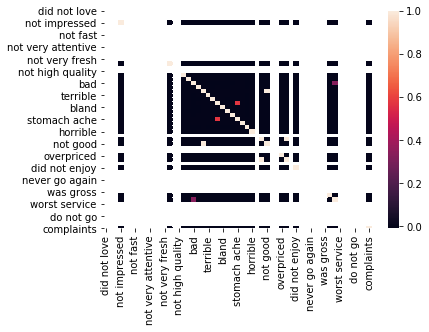

In [39]:
sns.heatmap(data.corr());

In [40]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 432


In [41]:
#Percent of mislabeled points
432/1000*100

43.2

In [42]:
#Success Rate/Accuracy of model
(1000-432)/1000*100

56.8

In [43]:
confusion_matrix(target, y_pred)

array([[ 68, 432],
       [  0, 500]], dtype=int64)

Confusion Matrix:

True Positive = 68 <br>
False Negative (Type I Error) = 432 <br>
False Positive (Type II Error) = 0 <br>
True Negative = 500 <br> <br>

Sensitivity (percent of positives correctly id, true positive rate) = (TP/TP + FN) = 68/(68+432) = 13.6% <br>
Specificity (percent of negatives correctly id, true negative rate) = (TN/TN + FP) = 500/(500+0) = 100% <br><br>

This iteration was vastly different than all previous iterations.  When I removed all of the positive keywords in the model,  two things happened.  First, Only 13.6% of positive reviews were correctly labeled.  Second, All of the negative reviews were correctly labeled.  I purposely focused on negative keywords in this iteration because my previous models had a large number of false positives.  So, I was able to reduce that number to zero.  However, in this case both positive and negative reviews are weighed equally, so this model isn't very good because the tradeoff doesn't make sense.  <br><br>

Precision (for minimizing false positives) = TP/(TP+FP) = 68/(68+0) = 100% <br>

#### Original

Percent of mislabeled points = 38.7% <br>
Success Rate/Accuracy of model = 61.3% <br><br>

True Positive = 478 <br>
False Negative (Type I Error) = 22 <br>
False Positive (Type II Error) = 365 <br>
True Negative = 135 <br><br>

Sensitivity  = 95.6% <br>
Specificity  = 27.0% <br><br>

#### Iteration 1
Percent of mislabeled points = 35.3% <br>
Success Rate/Accuracy of model = 64.7% <br><br>

True Positive = 474 <br>
False Negative (Type I Error) = 26 <br>
False Positive (Type II Error) = 327 <br>
True Negative = 173 <br><br>
 
Sensitivity = 94.8% <br>
Specificity = 34.6% <br><br>

#### Iteration 2
Percent of mislabeled points = 35.1% <br>
Success Rate/Accuracy of model = 64.9% <br><br>

True Positive = 475 <br>
False Negative (Type I Error) = 25 <br>
False Positive (Type II Error) = 326 <br>
True Negative = 174 <br> <br>

Sensitivity  = 95% <br>
Specificity = 34.8% <br><br>

#### Iteration 3
Same as Iteration 2

#### Iteration 4
Percent of mislabeled points = 35.0% <br>
Success Rate/Accuracy of model = 65.0% <br><br>

True Positive = 476 <br>
False Negative (Type I Error) = 24 <br>
False Positive (Type II Error) = 326 <br>
True Negative = 174 <br> <br>

Sensitivity = 95.2% <br>
Specificity  = 34.8% <br><br>

#### Iteration 5

Percent of mislabeled points = 43.2% <br>
Success Rate/Accuracy of model = 56.8% <br><br>

True Positive = 68 <br>
False Negative (Type I Error) = 432 <br>
False Positive (Type II Error) = 0 <br>
True Negative = 500 <br> <br>

Sensitivity  =  13.6% <br>
Specificity  = 100% <br><br>


### Challenge Questions: <br>

Do any of your classifiers seem to overfit?<br>
No, but I didn't train with a holdout group. Also, my model is simple and not overly complex. 

Which seem to perform the best? Why? <br>
Iterations 1, 2, 3, and 4 all performed very closely. However, iterations 2 and 3 had the exact same performance.  The difference in between the lowest and highest accuracy in the four models was .3% with approximately only 3 points going from mislabeled to correctly labeled.  In addition, the four iterations showed the same pattern of a large number of false positives in the confusion matrix.  <br><br>

Which features seemed to be most impactful to performance?<br>
Adding the appropriate positive and negative keywords had the most impact especially when words with qualifers (reducing positive/negative words that could go either way with changing context).  Anytime I removed any keywords due to being highly correlated with each other or by seeming too neutral only resulted in a higher number of mislabeled points.  